# Purpose of this simulation


# ideas

In [1]:
data_dump_folder = '/home/sijia-aw/BMi3D_my/operation_funny_chicken/sim_data/neurons_128/'

In [2]:
import numpy as np

percent_high_SNR_noises = np.arange(0.7, 0.6, -0.2)
#percent_high_SNR_noises[-1] = 0
num_noises = len(percent_high_SNR_noises)


percent_high_SNR_noises_labels = [f'{s:.2f}' for s in percent_high_SNR_noises]

print(percent_high_SNR_noises_labels)
print(num_noises)

['0.70']
1


# Experimental setup related to the questions

this part should be configured to directly test the hypothesis put forward in the previous section


In [3]:
import numpy as np
np.set_printoptions(precision=2, suppress=True)

mean_firing_rate_low = 50
mean_firing_rate_high = 100
noise_mode = 'fixed_gaussian'
fixed_noise_level = 5 #Hz


In [4]:


neuron_types = ['noisy', 'non_noisy']

n_neurons = 128
n_neurons_noisy_group = 32
n_neurons_no_noise_group = 96


no_noise_neuron_ind = np.arange(n_neurons_no_noise_group)
noise_neuron_ind = np.arange(n_neurons_no_noise_group, n_neurons_noisy_group + n_neurons_no_noise_group)

neuron_type_indices_in_a_list = [
    noise_neuron_ind, 
    no_noise_neuron_ind
]


noise_neuron_list = np.full(n_neurons, False, dtype = bool)
no_noise_neuron_list = np.full(n_neurons, False, dtype = bool)


noise_neuron_list[noise_neuron_ind] = True
no_noise_neuron_list[no_noise_neuron_ind] = True



neuron_type_bool_list = [
    noise_neuron_list,
    no_noise_neuron_list,
]

N_TYPES_OF_NEURONS = 2

print('We have two types of indices: ')
for t,l in enumerate(neuron_type_indices_in_a_list): print(f'{neuron_types[t]}:{l}')


We have two types of indices: 
noisy:[ 96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113
 114 115 116 117 118 119 120 121 122 123 124 125 126 127]
non_noisy:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95]


In [5]:
# make percent of count into a list 
percent_of_count_in_a_list = list()

for i in range(num_noises):
    percent_of_count = np.ones(n_neurons)[:, np.newaxis]

    percent_of_count[noise_neuron_ind] = 1
    percent_of_count[no_noise_neuron_ind] = percent_high_SNR_noises[i]
    
    percent_of_count_in_a_list.append(percent_of_count)

percent_of_count_in_a_list

[array([[0.7],
        [0.7],
        [0.7],
        [0.7],
        [0.7],
        [0.7],
        [0.7],
        [0.7],
        [0.7],
        [0.7],
        [0.7],
        [0.7],
        [0.7],
        [0.7],
        [0.7],
        [0.7],
        [0.7],
        [0.7],
        [0.7],
        [0.7],
        [0.7],
        [0.7],
        [0.7],
        [0.7],
        [0.7],
        [0.7],
        [0.7],
        [0.7],
        [0.7],
        [0.7],
        [0.7],
        [0.7],
        [0.7],
        [0.7],
        [0.7],
        [0.7],
        [0.7],
        [0.7],
        [0.7],
        [0.7],
        [0.7],
        [0.7],
        [0.7],
        [0.7],
        [0.7],
        [0.7],
        [0.7],
        [0.7],
        [0.7],
        [0.7],
        [0.7],
        [0.7],
        [0.7],
        [0.7],
        [0.7],
        [0.7],
        [0.7],
        [0.7],
        [0.7],
        [0.7],
        [0.7],
        [0.7],
        [0.7],
        [0.7],
        [0.7],
        [0.7],
        [0

In [6]:
np.set_printoptions(precision = 2)
#for comparision
#for comparision
exp_conds_add = [f'iter_{s}' for s in percent_high_SNR_noises]
exp_conds_keep = [f'same_{s}' for s in percent_high_SNR_noises]
exp_conds = [f'wo_FS_{s}' for s in percent_high_SNR_noises]

exp_conds.extend(exp_conds_add)
exp_conds.extend(exp_conds_keep)
print(f'we have experimental conditions {exp_conds}')

we have experimental conditions ['wo_FS_0.7', 'iter_0.7', 'same_0.7']


In [7]:
# CHANGE: game mechanics: generate task params
N_TARGETS = 8
N_TRIALS = 200

NUM_EXP = len(exp_conds) # how many experiments we are running. 

# Config the experiments

this section largely copyied and pasted from   
bmi3d-sijia(branch)-bulti_in_experiemnts
https://github.com/sijia66/brain-python-interface/blob/master/built_in_tasks/sim_task_KF.py

## load dependant libraries

In [8]:
GLOBAL_FIGURE_VERTICAL_SIZE = 4

In [9]:
# import libraries
# make sure these directories are in the python path., 
from bmimultitasks import SimBMIControlMulti, SimBMICosEncKFDec, BMIControlMultiNoWindow, SimpleTargetCapture, SimpleTargetCaptureWithHold
from features import SaveHDF
from features.simulation_features import get_enc_setup, SimKFDecoderRandom,SimIntentionLQRController, SimClockTick
from features.simulation_features import SimHDF, SimTime

from riglib import experiment

from riglib.stereo_opengl.window import FakeWindow
from riglib.bmi import train


from behaviour_metrics import  filter_state, sort_trials

from weights import calc_p_values_for_spike_batches_use_intended_kin
from weights import calc_single_batch_p_values_by_fitting_kinematics_to_spike_counts
import weights

import time
import copy
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import itertools #for identical sequences

np.set_printoptions(precision=2, suppress=True)


##  behaviour and task setup

In [10]:
#seq = SimBMIControlMulti.sim_target_seq_generator_multi(
#N_TARGETS, N_TRIALS)

from target_capture_task import ConcreteTargetCapture
seq = ConcreteTargetCapture.out_2D()

#create a second version of the tasks
seqs = itertools.tee(seq, NUM_EXP + 1)
target_seq = list(seqs[NUM_EXP])

seqs = seqs[:NUM_EXP]


SAVE_HDF = True
SAVE_SIM_HDF = True #this makes the task data available as exp.task_data_hist
DEBUG_FEATURE = False


#base_class = SimBMIControlMulti
base_class = SimpleTargetCaptureWithHold

#for adding experimental features such as encoder, decoder
feats = []
feats_2 = []
feats_set = [] # this is a going to be a list of lists 

## Additional task setup

In [11]:
from simulation_features import TimeCountDown
from features.sync_features import HDFSync


feats.append(HDFSync)
feats_2.append(HDFSync)

feats.append(TimeCountDown)
feats_2.append(TimeCountDown)

total_exp_time = 1200# in seconds

## encoder

the cosine tuned encoder uses a poisson process, right
https://en.wikipedia.org/wiki/Poisson_distribution
so if the lambda is 1, then it's very likely 

In [12]:
from features.simulation_features import get_enc_setup

ENCODER_TYPE = 'cosine_tuned_encoder_with_poisson_noise'

#neuron set up : 'std (20 neurons)' or 'toy (4 neurons)' 
N_NEURONS, N_STATES, sim_C = get_enc_setup(sim_mode = 'rot_90', n_neurons= n_neurons)

#multiply our the neurons
sim_C[noise_neuron_list] =  sim_C[noise_neuron_list]  * mean_firing_rate_low
sim_C[no_noise_neuron_list]  = sim_C[no_noise_neuron_list] * mean_firing_rate_high

#set up the encoder
from features.simulation_features import SimCosineTunedEncWithNoise
#set up intention feedbackcontroller
#this ideally set before the encoder
feats.append(SimIntentionLQRController)
feats.append(SimCosineTunedEncWithNoise)


feats_2.append(SimIntentionLQRController)
feats_2.append(SimCosineTunedEncWithNoise)

features.simulation_features: get_enc_setup has a tuning_level of 1 



## decoder setup

In [13]:
#clda on random 
DECODER_MODE = 'random' # random 

   #take care the decoder setup
if DECODER_MODE == 'random':
    feats.append(SimKFDecoderRandom)
    feats_2.append(SimKFDecoderRandom)
    print(f'{__name__}: set base class ')
    print(f'{__name__}: selected SimKFDecoderRandom \n')
else: #defaul to a cosEnc and a pre-traind KF DEC
    from features.simulation_features import SimKFDecoderSup
    feats.append(SimKFDecoderSup)
    feats_2.append(SimKFDecoderSup)
    print(f'{__name__}: set decoder to SimKFDecoderSup\n')

__main__: set base class 
__main__: selected SimKFDecoderRandom 



##  clda: learner and updater

In [14]:

#setting clda parameters 
##learner: collects paired data at batch_sizes
RHO = 0.5
batch_size = 100

#learner and updater: actualy set up rho
UPDATER_BATCH_TIME = 1
UPDATER_HALF_LIFE = np.log(RHO)  * UPDATER_BATCH_TIME / np.log(0.5)



LEARNER_TYPE = 'feedback' # to dumb or not dumb it is a question 'feedback'
UPDATER_TYPE = 'smooth_batch' #none or "smooth_batch"


#you know what? 
#learner only collects firing rates labeled with estimated estimates
#we would also need to use the labeled data
#now, we can set up a dumb/or not-dumb learner
if LEARNER_TYPE == 'feedback':
    from features.simulation_features import SimFeedbackLearner
    feats.append(SimFeedbackLearner)
    feats_2.append(SimFeedbackLearner)
else:
    from features.simulation_features import SimDumbLearner
    feats.append(SimDumbLearner)
    feats_2.append(SimDumbLearner)

#to update the decoder.
if UPDATER_TYPE == 'smooth_batch':
    from features.simulation_features import SimSmoothBatch
    feats.append(SimSmoothBatch)
    feats_2.append(SimSmoothBatch)
else: #defaut to none 
    print(f'{__name__}: need to specify an updater')

## feature selector setup

In [15]:
from feature_selection_feature import FeatureTransformer, TransformerBatchToFit
from feature_selection_feature import FeatureSelector, LassoFeatureSelector, SNRFeatureSelector, IterativeFeatureSelector
from feature_selection_feature import ReliabilityFeatureSelector


#pass the real time limit on clock
feats.append(FeatureSelector)
feats_2.append(IterativeFeatureSelector)


feature_x_meth_arg = [
    ('transpose', None ),
]

kwargs_feature = dict()
kwargs_feature = {
    'transform_x_flag':False,
    'transform_y_flag':False,
    'n_starting_feats': n_neurons,
    'n_states':  7
}

print('kwargs will be updated in a later time')
print(f'the feature adaptation project is tracking {kwargs_feature.keys()} ')

kwargs will be updated in a later time
the feature adaptation project is tracking dict_keys(['transform_x_flag', 'transform_y_flag', 'n_starting_feats', 'n_states']) 


## assistor setup

In [16]:
#assistor set up assist level
assist_level = (0.0, 0.0)

## (Check) config the experiment

In [17]:

exp_feats = [feats] * num_noises

e_f_2 = [feats_2] * num_noises

e_f_3 = [feats] * num_noises



exp_feats.extend(e_f_2)

exp_feats.extend(e_f_3)

In [18]:
if DEBUG_FEATURE: 
    from features.simulation_features import DebugFeature
    feats.append(DebugFeature)
    
if SAVE_HDF: 
    feats.append(SaveHDF)
    feats_2.append(SaveHDF)
if SAVE_SIM_HDF: 
    feats.append(SimHDF)
    feats_2.append(SimHDF)
    
    
#pass the real time limit on clock
feats.append(SimClockTick)
feats.append(SimTime)

feats_2.append(SimClockTick)
feats_2.append(SimTime)


In [19]:

kwargs_exps = list()

for i in range(num_noises):
    d = dict()
    
    d['total_exp_time'] = total_exp_time
    
    d['assist_level'] = assist_level
    d['sim_C'] = sim_C
    
    d['noise_mode'] = noise_mode
    d['percent_noise'] = percent_of_count_in_a_list[i]
    d['fixed_noise_level'] = fixed_noise_level
    
    d['batch_size'] = batch_size
    
    d['batch_time'] = UPDATER_BATCH_TIME
    d['half_life'] = UPDATER_HALF_LIFE
    d['no_noise_neuron_ind'] = no_noise_neuron_ind
    d['noise_neuron_ind'] = noise_neuron_ind
    
    d.update(kwargs_feature)
    
    kwargs_exps.append(d)

kwargs_exps_add = copy.deepcopy(kwargs_exps)
kwargs_exps_start = copy.deepcopy(kwargs_exps)

for k in kwargs_exps_add:
    
    k['init_feat_set'] = np.full(N_NEURONS, False, dtype = bool)
    k['init_feat_set'][no_noise_neuron_list] = True

for k in kwargs_exps_start:
    
    k['init_feat_set'] = np.full(N_NEURONS, False, dtype = bool)
    k['init_feat_set'][no_noise_neuron_list] = True


kwargs_exps.extend(kwargs_exps_add)
kwargs_exps.extend(kwargs_exps_start)

print(f'we have got {len(kwargs_exps)} exps')
kwargs_exps[1]['init_feat_set']

we have got 3 exps


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False]

## make and initalize experiment instances

In [20]:
#seed the experiment
np.random.seed(0)


exps = list()#create a list of experiment

for i,s in enumerate(seqs):
    #spawn the task
    f = exp_feats[i]
    Exp = experiment.make(base_class, feats=f)
    
    e = Exp(s, **kwargs_exps[i])
    exps.append(e)


exps_np  = np.array(exps, dtype = 'object')



features.simulation_features.SimIntentionLQRController: LQRController used 


 features.simulation_features.SimFeedbackLearner: start to create a sim leaner with a batchsize of 100
features.simulation_features.SimSmoothBatch: rho in this simulation is  0.5

finished executing Experiment.__init__
in feature selector mod
feature init: [array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True

# Pre-experiment check: check the Kalman filter before training

# Experiment run: assemble into a complete loop

## actually running the experiments

In [21]:
def get_KF_C_Q_from_decoder(first_decoder):
    """
    get the decoder matrices C, Q from the decoder instance
    
    Args:
        first_decoder: riglib.bmi.decoder.
    Returns:
        target_C, target_Q: np.ndarray instances
    """
    target_C = first_decoder.filt.C
    target_Q = np.copy(first_decoder.filt.Q)
    diag_val = 10000
    np.fill_diagonal(target_Q, diag_val)
    
    return (target_C, target_Q)
    
    

In [22]:
from feature_selection_feature import run_exp_loop

WAIT_FOR_HDF_FILE_TO_STOP = 10

for i,e in enumerate(exps):
    np.random.seed(10)
    
    e.init()
    
    

    # save the decoder if it is the first one. 
    if i == 0:
        (target_C, target_Q) = get_KF_C_Q_from_decoder(e.decoder)
        
        weights.change_target_kalman_filter_with_a_C_mat(e.decoder.filt, target_C, 
                                                 Q= target_Q, debug=False)
    
    else:  # otherwise, just replace it.  
            weights.change_target_kalman_filter_with_a_C_mat(e.decoder.filt, target_C, 
                                                     Q= target_Q, debug=False)
            
    e.select_decoder_features(e.decoder)
    e.record_feature_active_set(e.decoder)
    
    #################################################################
    # actual experiment begins
    run_exp_loop(e, **kwargs_exps[i])
    
    e.hdf.stop()
    print(f'wait for {WAIT_FOR_HDF_FILE_TO_STOP}s for hdf file to save')
    time.sleep(WAIT_FOR_HDF_FILE_TO_STOP)
    
    
    e.save_feature_params()
    
    time.sleep(WAIT_FOR_HDF_FILE_TO_STOP)
    
    e.cleanup_hdf()
   

    e.sinks.reset()
    
    print(f'Finished running  {exp_conds[i]}')
    
    print()
    




 using encoder with additional noises  State space: ['hand_px', 'hand_py', 'hand_pz', 'hand_vx', 'hand_vy', 'hand_vz', 'offset'] 

<bound method GenericCosEncWithNoise._gen_fixed_gaussian_noise of <riglib.bmi.sim_neurons.GenericCosEncWithNoise object at 0x7ff0e7209a00>>
neural encoder init function  <SimpleTargetCaptureWithHold(Thread-4, initial)>
features.simulation_features: added tracking of K matrix
sinkmanager start <class 'hdfwriter.hdfwriter.HDFWriter'>
HDFWriter: Saving datafile to /tmp/tmp3s32ww8z.h5
HDFWriter: opening file
HDFWriter registered 'sync_events'
HDFWriter registered 'sync_clock'
HDFWriter registered 'trials'
HDFWriter registered 'task'
features.simulation_features: batch size is 100
Reset states for learner: 
[]
Done states for learner: 
[]

features.simulation_features.SimFeedbackLearner: flip the self.learn_flag to true
features.simulation_features.SimFeedbackLearner: succussfully created a feedback controller learner


SimSmoothBatch: created an updater with a

/home/sijia-aw/BMi3D_my/lab_bmi3d/riglib/bmi/kfdecoder.py:372: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  C = np.mat(np.linalg.lstsq(X.T, Y.T)[0].T)


finish  at cycle_count: 72000
..........................Closed hdf
ended datasink
0
exit
end of FSM.run, task state is None
wait for 10s for hdf file to save
saving file name to /tmp/tmp3s32ww8z.h5
riglib.bmi.bmi: clda table names
['kf.C', 'kf.Q', 'kf.C_xpose_Q_inv_C', 'kf.C_xpose_Q_inv', 'mFR', 'sdFR', 'rho', 'intended_kin', 'spike_counts_batch']
Finished running  wo_FS_0.7


 using encoder with additional noises  State space: ['hand_px', 'hand_py', 'hand_pz', 'hand_vx', 'hand_vy', 'hand_vz', 'offset'] 

<bound method GenericCosEncWithNoise._gen_fixed_gaussian_noise of <riglib.bmi.sim_neurons.GenericCosEncWithNoise object at 0x7ff0dcf85100>>
neural encoder init function  <SimpleTargetCaptureWithHold(Thread-5, initial)>
features.simulation_features: added tracking of K matrix
sinkmanager start <class 'hdfwriter.hdfwriter.HDFWriter'>
HDFWriter: Saving datafile to /tmp/tmp4g0b39cq.h5
HDFWriter: opening file
HDFWriter registered 'sync_events'
HDFWriter registered 'sync_clock'
HDFWriter re

/home/sijia-aw/BMi3D_my/lab_bmi3d/riglib/bmi/kfdecoder.py:372: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  C = np.mat(np.linalg.lstsq(X.T, Y.T)[0].T)


decoder changes here at 36600
(96, 7)
(96, 7)
active feature set is [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
 False False False False False False False False False False False False
 False False False False False False False False False False False  True
  True  True  True  True  True  True  True  True]
after trans: (105, 7)
after trans: (105, 105)
decoder change flag to false
decoder changes here at 37200
(105, 7)
(105, 7)
active feature set is [ True 

decoder changes here at 42000
(113, 7)
(113, 7)
active feature set is [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
 False False False False False False False False False False False False
 False False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True]
after trans: (114, 7)
after trans: (114, 114)
decoder change flag to false
decoder changes here at 42600
(114, 7)
(114, 7)
active feature set is [ Tru

decoder changes here at 47400
(122, 7)
(122, 7)
active feature set is [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
 False False False False False  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True]
after trans: (123, 7)
after trans: (123, 123)
decoder change flag to false
decoder changes here at 48000
(123, 7)
(123, 7)
active feature set is [ Tru

decoder changes here at 52800
(128, 7)
(128, 7)
active feature set is [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True]
after trans: (128, 7)
after trans: (128, 128)
decoder change flag to false
decoder changes here at 53400
(128, 7)
(128, 7)
active feature set is [ Tru

decoder changes here at 58200
(128, 7)
(128, 7)
active feature set is [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True]
after trans: (128, 7)
after trans: (128, 128)
decoder change flag to false
decoder changes here at 58800
(128, 7)
(128, 7)
active feature set is [ Tru

decoder changes here at 63600
(128, 7)
(128, 7)
active feature set is [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True]
after trans: (128, 7)
after trans: (128, 128)
decoder change flag to false
decoder changes here at 64200
(128, 7)
(128, 7)
active feature set is [ Tru

decoder changes here at 69000
(128, 7)
(128, 7)
active feature set is [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True]
after trans: (128, 7)
after trans: (128, 128)
decoder change flag to false
decoder changes here at 69600
(128, 7)
(128, 7)
active feature set is [ Tru

In [23]:
import shutil

import os
import subprocess

for i,e in enumerate(exps): 


    import subprocess
    old = e.h5file.name
    new = data_dump_folder + exp_conds[i] +'.h5'
    process = "cp {} {}".format(old,new)
    
    print(process)
    subprocess.run(process, shell=True) # do not remember, assign shell value to True.



cp /tmp/tmp3s32ww8z.h5 /home/sijia-aw/BMi3D_my/operation_funny_chicken/sim_data/neurons_128/wo_FS_0.7.h5
cp /tmp/tmp4g0b39cq.h5 /home/sijia-aw/BMi3D_my/operation_funny_chicken/sim_data/neurons_128/iter_0.7.h5
cp /tmp/tmphx__ks7y.h5 /home/sijia-aw/BMi3D_my/operation_funny_chicken/sim_data/neurons_128/same_0.7.h5


# Postprocessing the data for loading

In [24]:
for e in exps: print(f'{e.h5file.name}')


/tmp/tmp3s32ww8z.h5
/tmp/tmp4g0b39cq.h5
/tmp/tmphx__ks7y.h5


In [25]:
import os
import aopy
import tables

exp_data_all = list()
exp_data_metadata_all = list()

for i,e in enumerate(exp_conds):
    files = {

    'hdf':e+'.h5'

    }
    
    file_name = os.path.join(data_dump_folder, files['hdf'])

        
    # write in the exp processing files
    
    aopy.data.save_hdf(data_dump_folder, file_name, kwargs_exps[i], data_group="/feature_selection", append = True)
    
    with tables.open_file(file_name, mode = 'r') as f: print(f)
    
    try:
        d,m = aopy.preproc.parse_bmi3d(data_dump_folder, files)
    except:
        print(f'cannot parse {e}')
    

/home/sijia-aw/BMi3D_my/operation_funny_chicken/sim_data/neurons_128/wo_FS_0.7.h5 (File) ''
Last modif.: 'Fri Oct  8 16:03:50 2021'
Object Tree: 
/ (RootGroup) ''
/clda (Table(120,), shuffle, zlib(5)) ''
/sync_clock (Table(72000,), shuffle, zlib(5)) ''
/sync_events (Table(1736,), shuffle, zlib(5)) ''
/task (Table(72000,), shuffle, zlib(5)) ''
/task_msgs (Table(1735,), shuffle, zlib(5)) ''
/trials (Table(584,), shuffle, zlib(5)) ''
/feature_selection (Group) ''
/feature_selection/C_mat (Array(121, 128, 7)) ''
/feature_selection/K_mat (Array(121, 7, 128)) ''
/feature_selection/Q_diag (Array(121, 128)) ''
/feature_selection/assist_level (Array(2,)) ''
/feature_selection/batch_size (Array()) ''
/feature_selection/batch_time (Array()) ''
/feature_selection/feat_set (Array(122, 128)) ''
/feature_selection/fixed_noise_level (Array()) ''
/feature_selection/half_life (Array()) ''
/feature_selection/n_starting_feats (Array()) ''
/feature_selection/n_states (Array()) ''
/feature_selection/no_nois

/home/sijia-aw/BMi3D_my/lib/python3.8/site-packages/tables/group.py:1201: UserWarning: problems loading leaf ``/feature_selection/noise_mode``::

  variable length strings are not supported yet

The leaf will become an ``UnImplemented`` node.
  warnings.warn(


/home/sijia-aw/BMi3D_my/operation_funny_chicken/sim_data/neurons_128/iter_0.7.h5 (File) ''
Last modif.: 'Fri Oct  8 16:03:51 2021'
Object Tree: 
/ (RootGroup) ''
/clda (Table(61,), shuffle, zlib(5)) ''
/sync_clock (Table(72000,), shuffle, zlib(5)) ''
/sync_events (Table(2091,), shuffle, zlib(5)) ''
/task (Table(72000,), shuffle, zlib(5)) ''
/task_msgs (Table(2090,), shuffle, zlib(5)) ''
/trials (Table(699,), shuffle, zlib(5)) ''
/feature_selection (Group) ''
/feature_selection/C_mat (Array(121, 128, 7)) ''
/feature_selection/K_mat (Array(121, 7, 128)) ''
/feature_selection/Q_diag (Array(121, 128)) ''
/feature_selection/assist_level (Array(2,)) ''
/feature_selection/batch_size (Array()) ''
/feature_selection/batch_time (Array()) ''
/feature_selection/feat_set (Array(122, 128)) ''
/feature_selection/fixed_noise_level (Array()) ''
/feature_selection/half_life (Array()) ''
/feature_selection/init_feat_set (Array(128,)) ''
/feature_selection/n_starting_feats (Array()) ''
/feature_selection/

## declare defs and conventions

In [26]:
CENTER_TARGET_ON = 16
CURSOR_ENTER_CENTER_TARGET = 80
CENTER_TARGET_OFF = 32
REWARD = 48
DELAY_PENALTY = 66
TIMEOUT_PENALTY = 65
HOLD_PENALTY = 64
TRIAL_END = 239

In [27]:
from feature_selection_feature import *


## looking at one example data

In [28]:
exp_data, exp_metadata = aopy.preproc.parse_bmi3d(data_dump_folder, files)


clock = exp_data['clock']
print(clock.dtype)
events = exp_data['events']
print(events.dtype)

{'names':['prev_tick','timestamp_bmi3d'], 'formats':['<f8','<f8'], 'offsets':[16,24], 'itemsize':32}
[('time', '<u8'), ('event', 'S32'), ('data', '<u4'), ('code', 'u1'), ('timestamp_bmi3d', '<f8'), ('timestamp', '<f8')]


In [29]:
CURSOR_ENTER_CENTER_TARGET

80

In [30]:
event_names = events['event']
event_cycles = events['time'] # confusingly, 'time' here refers to cycle count

print(events['code'])

target_codes = range(17, 25)



trial_segments, trial_times = aopy.preproc.get_trial_segments(events['code'], event_cycles, target_codes, [REWARD, HOLD_PENALTY, DELAY_PENALTY])
trial_segments = np.array(trial_segments)
print(trial_segments[:10])
print(trial_times[:10])

[238 22 65 ... 48 23 255]
[[20 84 48]
 [19 83 48]
 [21 85 48]
 [17 81 48]
 [21 85 48]
 [22 86 48]
 [19 83 48]
 [20 84 48]
 [17 81 48]
 [18 82 48]]
[[1807 1891]
 [1892 2005]
 [2608 3109]
 [3110 3246]
 [3247 3343]
 [3344 3463]
 [3464 3630]
 [3631 3709]
 [3710 3834]
 [3835 3960]]


In [31]:
cursor_kinematics = exp_data['task']['cursor'][:,[0,2]] # cursor (x, z, y) position on each bmi3d cycle
time = exp_data['bmi3d_clock']['timestamp']

In [32]:
trial_indices = [range(t[0], t[1]) for t in trial_times]
cursor_trajectories = [cursor_kinematics[t] for t in trial_indices]


In [33]:
# get the unique target positions

trials = exp_data['trials']

print(trials)

n_trials = len(trials)

trial_targets = aopy.postproc.get_trial_targets(trials['trial'], trials['target'][:,[0,2]]) # (x, z, y) -> (x, y)

unique_targets = np.unique(np.concatenate(([t[1] for t in trial_targets], trial_targets[0])), axis=0)

[(0, 6, [ -0.  ,   0.  , -10.  ]) (0, 8, [ 10.  ,   0.  ,  -0.  ])
 (0, 2, [  0.  ,   0.  ,  10.  ]) (0, 4, [-10.  ,   0.  ,   0.  ])
 (0, 3, [ -7.07,   0.  ,   7.07]) (0, 7, [  7.07,   0.  ,  -7.07])
 (0, 5, [ -7.07,   0.  ,  -7.07]) (0, 1, [  7.07,   0.  ,   7.07])
 (0, 5, [ -7.07,   0.  ,  -7.07]) (0, 6, [ -0.  ,   0.  , -10.  ])
 (0, 3, [ -7.07,   0.  ,   7.07]) (0, 4, [-10.  ,   0.  ,   0.  ])
 (0, 1, [  7.07,   0.  ,   7.07]) (0, 2, [  0.  ,   0.  ,  10.  ])
 (0, 7, [  7.07,   0.  ,  -7.07]) (0, 8, [ 10.  ,   0.  ,  -0.  ])
 (0, 1, [  7.07,   0.  ,   7.07]) (0, 3, [ -7.07,   0.  ,   7.07])
 (0, 4, [-10.  ,   0.  ,   0.  ]) (0, 5, [ -7.07,   0.  ,  -7.07])
 (0, 2, [  0.  ,   0.  ,  10.  ]) (0, 7, [  7.07,   0.  ,  -7.07])
 (0, 8, [ 10.  ,   0.  ,  -0.  ]) (0, 6, [ -0.  ,   0.  , -10.  ])
 (0, 3, [ -7.07,   0.  ,   7.07]) (0, 6, [ -0.  ,   0.  , -10.  ])
 (0, 5, [ -7.07,   0.  ,  -7.07]) (0, 2, [  0.  ,   0.  ,  10.  ])
 (0, 1, [  7.07,   0.  ,   7.07]) (0, 8, [ 10.  ,   0.  ,  -0.

In [34]:


exp_metadata['cursor_bounds']

(-10.0, 10.0, 0.0, 0.0, -10.0, 10.0)

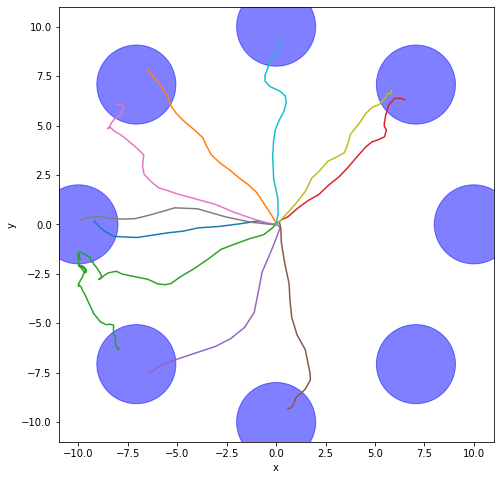

In [35]:
fig, ax = plt.subplots(figsize=(8,8))
bounds = np.array([-10, 10, -10, 10])
aopy.visualization.plot_trajectories(cursor_trajectories[:10], bounds=bounds)
aopy.visualization.plot_targets(unique_targets, exp_metadata['target_radius'])

## Refactor out the data

## Finished time in seconds

# Post data analysis

In [36]:
import seaborn as sns


## Total finished trials

In [37]:
#calculate how many trials
for e in  exps: print(e.calc_state_occurrences('reward'))
print()

for e in  exps: print(e.calc_trial_num())

0
0
0

0
0
0


## Overall  trial statistics succuss rate)

In [38]:
import behaviour_metrics
import importlib

sns.set_context(context = 'talk')
importlib.reload(behaviour_metrics)

reward_events_per_minute = [behaviour_metrics.calc_event_rate_from_state_log(e.state_log,'reward',window_length=30) for e in exps]
reward_events_per_minute = np.array(reward_events_per_minute)

print(reward_events_per_minute)
plt.plot(reward_events_per_minute.T)
plt.legend(exp_conds, bbox_to_anchor=(1, -0.1))
plt.xlabel('Time (min)')
plt.ylabel('Rewards (#)')

TypeError: 'float' object cannot be interpreted as an integer

## Sort into trials

In [ ]:
state_log = e.state_log
segmented_trials = behaviour_metrics.segment_trials_in_state_log(state_log)

In [ ]:
trial_dicts_all = []
dict_keys = ['cursor', #behaviour
             'ctrl_input', 'spike_counts', #encoder translates intended ctrl into spike counts
             'decoder_state']


for i in range(NUM_EXP):
    
    segmented_trials = behaviour_metrics.segment_trials_in_state_log(exps[i].state_log)

    task_data_hist_np = task_data_hist_np_all[i]
    trial_dict_0 = behaviour_metrics.sort_trials_use_segmented_log(segmented_trials, 
                               target_seq,
                               task_data_hist_np, dict_keys)
    
    trial_dicts_all.append(trial_dict_0)

for t in trial_dicts_all: print(len(t))

# Behaviour  analyses

## Trajectory analysis

In [ ]:
import afs_plotting
importlib.reload(afs_plotting)

In [ ]:
figure_trajectory, axes_trajectory = plt.subplots(1, NUM_EXP, figsize = (NUM_EXP * GLOBAL_FIGURE_VERTICAL_SIZE, 
                                                  GLOBAL_FIGURE_VERTICAL_SIZE)) 


n_roi_trials = 0

CIRCLE_RADIUS = exps[0].target_radius

print(CIRCLE_RADIUS)

for i,axes in enumerate(axes_trajectory): 

    afs_plotting.add_center_out_grid(axes, target_seq, CIRCLE_RADIUS)
    
    
    sample_trial = trial_dicts_all[i][n_roi_trials]
    trial_cursor_trajectory = sample_trial['cursor']
    
    afs_plotting.plot_trial_trajectory(axes, trial_cursor_trajectory)

    axes.set_title(f'Trial {N_TRIALS} of {exp_conds[i]} ')



## Variance analysis

In [ ]:
importlib.reload(behaviour_metrics)

In [ ]:
arc_length = [behaviour_metrics.calc_arc_length_from_trial_dict(trial_dict) for trial_dict in trial_dicts_all]
for al in arc_length: plt.plot(al)
plt.legend(exp_conds)

# Kalman filter

## encoder

the job of the encoder is to directly encode intention into firing rates
the direct measure is just pearson correlation coefficients between 
the intentions and the firing rates

## decoder

In [ ]:
from afs_plotting import plot_prefered_directions

TEXT_OFFSET_VERTICAL = -0.2


figure_decoder_C.suptitle('KF C matrix before and after CLDA')

print('steady state tuning curves:')

for  i,e in enumerate(exps): 

    e = exps[i]
    C = e.decoder.filt.C

    plot_prefered_directions(C, ax = axs_decoder_C[1,i])
    axs_decoder_C[1,i].set_title(f'{exp_conds[i]}')

figure_decoder_C

## Decoder compared to the encoder



In [ ]:
len(exps)

In [ ]:
import convergence_analysis
importlib.reload(convergence_analysis)
from convergence_analysis import calc_cosine_sim_bet_two_matrices, calc_cosine_to_target_matrix

active_feat_set = exps[2]._active_feat_set


for i,e in enumerate(exps):
    enc_directions = e.encoder.C
    dec_directions = np.array(e._used_C_mat_list)
    

    angles_hist = calc_cosine_to_target_matrix( dec_directions,enc_directions)
    
    if i == 0:
        active_angles = np.mean(angles_hist[:,noise_neuron_list], axis = 1)
        plt.plot(active_angles)
    
    active_angles = np.mean(angles_hist[:,active_feat_set], axis = 1)
    
    plt.plot(active_angles)



## looking at K matrix

In [ ]:
figure_k_matrix, axes_k_matrix = plt.subplots(2,NUM_EXP,
                                          figsize = (GLOBAL_FIGURE_VERTICAL_SIZE * NUM_EXP,
                                                    GLOBAL_FIGURE_VERTICAL_SIZE * 2))

for i,e in enumerate(exps):
    K = (e._used_K_mat_list[1]).T

    plot_prefered_directions(K, ax  = axes_k_matrix[0, i])
    axes_k_matrix[0, i].set_title(exp_conds[i])

for i,e in enumerate(exps):
    K = (e._used_K_mat_list[-1]).T
    plot_prefered_directions(K, ax  = axes_k_matrix[1, i])
    axes_k_matrix[1,i].set_title(exp_conds[i])
    
    
figure_k_matrix.tight_layout()

# Feature analysis

In [ ]:
from matplotlib import colors



fig_feature_active_map, axes_feat_active_map = plt.subplots(1, NUM_EXP,
                                                            figsize = ( NUM_EXP * GLOBAL_FIGURE_VERTICAL_SIZE,
                                                                      GLOBAL_FIGURE_VERTICAL_SIZE),
                                                           sharey = True)
axes_feat_active_map[0].set_ylabel('Learner Batch number')

#color true to yellow
cmap = colors.ListedColormap(['yellow'])

for i, exp in enumerate(exps):

    active_feat_heat_map = np.array(exp._active_feat_set_list, dtype = np.int32)
    active_feat_heat_map = np.ma.masked_where(active_feat_heat_map == False, active_feat_heat_map)
    a = axes_feat_active_map[i].imshow(active_feat_heat_map, cmap = cmap)

    #color false to blue
    cmap.set_bad(color='blue')
    
    axes_feat_active_map[i].set_xlabel('All features')
    axes_feat_active_map[i].set_title(exp_conds[i])


#fig_feature_active_map.colorbar(a, ax=axes_feat_active_map.ravel().tolist())

## Examine used K mat

## examine used C mat

In [ ]:
import weights_linear_regression
importlib.reload(weights_linear_regression)
from weights_linear_regression import calc_a_history_of_matrix_L2norms_along_first_axis


figure_weights_norm, axes_weights_norm = plt.subplots( NUM_EXP, N_TYPES_OF_NEURONS,
    figsize = (N_TYPES_OF_NEURONS * GLOBAL_FIGURE_VERTICAL_SIZE, NUM_EXP * GLOBAL_FIGURE_VERTICAL_SIZE))

C_mat_all = list()

for j,exp in enumerate(exps):
    
    updated_C_mat = np.array(exp._used_C_mat_list)
    the_history_of_KF_weights_in_time_by_neurons = calc_a_history_of_matrix_L2norms_along_first_axis(updated_C_mat, debug = False)

    C_mat_all.append(np.copy(updated_C_mat))
    axe_exp = axes_weights_norm[j,:]
    for i,a in enumerate(axe_exp):
        a.plot(the_history_of_KF_weights_in_time_by_neurons[:, neuron_type_indices_in_a_list[i]])
        a.set_xlabel('Batch number')
        a.set_ylabel('Weight')
        
C_mat_all = np.array(C_mat_all)

In [ ]:
fig_compr_means, axes_compr_means = plt.subplots(1, N_TYPES_OF_NEURONS,
                                                figsize = (GLOBAL_FIGURE_VERTICAL_SIZE * N_TYPES_OF_NEURONS,
                                                          GLOBAL_FIGURE_VERTICAL_SIZE),
                                                sharey = True)
selected_feature_set = no_noise_neuron_list
for i,a in enumerate(axes_compr_means):

    type_neuron_list = neuron_type_bool_list[i]
    
    for C in C_mat_all:


        the_history_of_KF_weights_in_time_by_neurons = calc_a_history_of_matrix_L2norms_along_first_axis(C, 
                                                                                                         target_C=e.encoder.C,
                                                                indices_to_sum=(X_VEL_STATE_IND, Y_VEL_STATE_IND))


        selected_neurons = np.logical_and(selected_feature_set, type_neuron_list)

        selected_mean = np.mean(the_history_of_KF_weights_in_time_by_neurons[:,selected_neurons], axis = 1)
        std = np.std(the_history_of_KF_weights_in_time_by_neurons[:,selected_neurons], axis = 1)
        
        line = a.plot(selected_mean)
        
        x_data = np.arange((selected_mean).shape[0])
        
        
        a.fill_between(x_data ,selected_mean - std, selected_mean + std, alpha = 0.1 )
        a.legend(exp_conds)
        
handles, labels = a.get_legend_handles_labels()
fig_compr_means.legend(handles, labels, loc='lower center')
plt.show()
    
#axes_compr_means.set_title('Means of the high SNR weight trajectory')